## TS11
#### Franco Ruggiero

1) Ej. 6 TP Síntesis de Cuadripolos) 

Sintetizar un cuadripolo que cumpla con los siguientes parámetros:


 #### $Y_{11} = \dfrac{I_1}{V_1}∣_{V_2=0}\ = \ \dfrac{3s(s^2+7/3)}{(s^2+2)(s^2+5)}$

 #### $Y_{21} = \dfrac{I_2}{V_1}∣_{V_2=0}\ = \ \dfrac{s(s^2+1)}{(s^2+2)(s^2+5)}$

a) Obtener la topología mediante la síntesis gráfica, es decir la red sin valores.

b) Calcular el valor de los componentes, es decir la síntesis analítica.

c) Verificar los parámetros en el cuadripolo sintetizado.

> <img src="1_1.jpg" style="width:700px ; height:900px">
> <img src="1_2.jpg" style="width:700px ; height:900px">
> <img src="1_3.jpg" style="width:700px ; height:900px">
> <img src="1_4.jpg" style="width:700px ; height:900px">


In [56]:
import sympy as sp
from schemdraw import Drawing
import numpy as np

# Ahora importamos las funciones de PyTC2

from pytc2.remociones import remover_polo_dc, remover_polo_jw, remover_polo_infinito
from pytc2.dibujar import display, dibujar_puerto_entrada, dibujar_puerto_salida, dibujar_funcion_exc_abajo,  dibujar_elemento_serie, dibujar_elemento_derivacion,  dibujar_tanque_derivacion, dibujar_tanque_RC_serie,  dibujar_espacio_derivacion, Capacitor, Resistor, ResistorIEC
from pytc2.general import print_latex, print_subtitle, a_equal_b_latex_s
from IPython.display import display,  Markdown

def custom_remover_polo_jw(imit, omega_cuadrado):

    kk = sp.simplify(sp.expand(imit*(s**2+omega_cuadrado)/s)).subs(s**2, -omega_cuadrado)

    C = kk/omega_cuadrado
    L = 1/kk

    imit_r = sp.factor(sp.simplify(sp.expand(imit - kk*s/(s**2 + omega_cuadrado))))

    return ( [imit_r, kk, L, C] )
    
# Resolución simbólica
s = sp.symbols('s', complex=True)

In [57]:

# Sea la siguiente función de excitación
YY = 3*s*(s**2 + sp.Rational(7,3))/((s**2 + 2)*(s**2 + 5))
print_latex(a_equal_b_latex_s('Y_{(s)}', YY))

Z, k0 = remover_polo_dc(1/YY, omega_zero=1)

print_latex(a_equal_b_latex_s('Z_{c1(s)}', k0))
print_latex('Z_{2(s)} = Y_{(s)} - Y_{c1(s)}')
print_latex(a_equal_b_latex_s('Z_{2(s)}', Z))


C1 = k0.subs(s, 1)



<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [58]:
Y, kk, L2, C2 = remover_polo_jw(1/Z, isImpedance=False, omega=1)

print_latex(a_equal_b_latex_s('L', L2))
print_latex(a_equal_b_latex_s('C', C2))
print_latex(a_equal_b_latex_s('Y_{3(s)}', Y))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [59]:
Y, kk, L3, C3 = custom_remover_polo_jw(Y, 3)

print_latex(a_equal_b_latex_s('L', L3))
print_latex(a_equal_b_latex_s('C', C3))
print_latex(a_equal_b_latex_s('Y_{4(s)}', Y))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

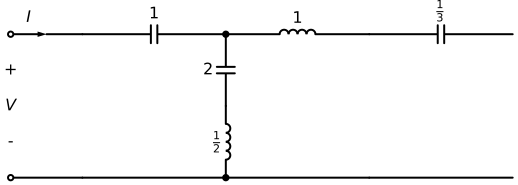

In [60]:
d = dibujar_puerto_entrada(Drawing(unit=4),
                        voltage_lbl = ('+', '$V$', '-'),
                        current_lbl = '$I$')

d = dibujar_elemento_serie(d, 'C', C1)

d = dibujar_tanque_derivacion(d, L2, C2)

d = dibujar_elemento_serie(d, 'L', L3)

d = dibujar_elemento_serie(d, 'C', C3)

display(d)

In [61]:
ZA = 1/(s*C1)

ZB = 1/(s*C2) + s*L2

ZC = 1/(s*C3) + s*L3

Z = sp.Matrix([[ZA + ZB, ZB], [ZB, ZB + ZC]])
det = Z.det()

print_latex(a_equal_b_latex_s('Y_{11}(s)', sp.factor(sp.simplify(Z[1,1]/det))))
print_latex(a_equal_b_latex_s('Y_{21}(s)', sp.factor(sp.simplify(Z[1,0]/det))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## 2. Sintetizar un cuadripolo que implemente la siguiente transferencia de tensiones en vacío:

 #### $\dfrac{V_2}{V_1}∣_{I_2=0} \ = \ \dfrac{(s^2+2)(s^2+9)}{(s^2+1)(s^2+3)}$

a) Obtener la topología mediante la síntesis gráfica, es decir la red sin valores.

b) Calcular el valor de los componentes, es decir la síntesis analítica.

> <img src="-2_1.jpg" style="width:700px ; height:550px">
> <img src="-2_2.jpg" style="width:700px ; height:600px">
> <img src="-2_3.jpg" style="width:700px ; height:900px">
> <img src="-2_4.jpg" style="width:700px ; height:600px">
> <img src="-2_5.jpg" style="width:750px ; height:850px">
> <img src="-2_6.jpg" style="width:750px ; height:700px">
> <img src="-2_7.jpg" style="width:700px ; height:500px">
> <img src="-2_8.jpg" style="width:700px ; height:500px">


c) Verificar los parámetros en el cuadripolo sintetizado.

In [42]:
# Sea la siguiente función de excitación
ZZ = (s**2 + 1)*(s**2 + 3)/(s*(s**2 + 2))

print_latex(a_equal_b_latex_s('Z_{11(s)}', ZZ))

<IPython.core.display.Math object>

In [46]:
Z1, ZL1 = remover_polo_infinito (ZZ ,omega_zero= 3, isSigma=False )
print_latex(a_equal_b_latex_s('Z_{L1(s)}', ZL1))
print_latex(a_equal_b_latex_s('Z_{2(s)}', Z1))

L1 = ZL1.subs(s, 1)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [47]:
Y2, kk, L2, C2 = remover_polo_jw(1/Z1, isImpedance=False, omega=3)
print_latex(a_equal_b_latex_s('L', L2))
print_latex(a_equal_b_latex_s('C', C2))
print_latex(a_equal_b_latex_s('Y_{2(s)}', Y2))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [48]:
Z2 = 1/Y2

k_inf = sp.simplify(sp.expand(Z2/s)).subs(s**2, -2) * s

Z2 = sp.factor(sp.simplify(sp.expand(Z2 - k_inf)))

print_latex(a_equal_b_latex_s('Z_{L3(s)}', k_inf))
print_latex(a_equal_b_latex_s('Z_{2(s)}', Z2))

L3 = k_inf.subs(s, 1)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [49]:
Y3, kk, L4, C4 = custom_remover_polo_jw(1/Z2, 2)

print_latex(a_equal_b_latex_s('L', L4))
print_latex(a_equal_b_latex_s('C', C4))
print_latex(a_equal_b_latex_s('Y_{3(s)}', Y3))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

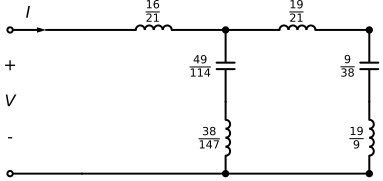

In [50]:
d = dibujar_puerto_entrada(Drawing(unit=4),
                        voltage_lbl = ('+', '$V$', '-'),
                        current_lbl = '$I$')

d = dibujar_elemento_serie(d, 'L', L1)

d = dibujar_tanque_derivacion(d, L2, C2)

d = dibujar_elemento_serie(d, 'L', L3)

d = dibujar_tanque_derivacion(d, L4, C4)

display(d)

In [53]:
Z1 = s*L1
Y1 = 1/(1/(s*C2)+s*L2)

Z2 = s*L3
Y2 = 1/(1/(s*C4)+s*L4)

T1 = sp.Matrix([[1+Z1*Y1, Z1],[Y1, 1]])
T2 = sp.Matrix([[1+Z2*Y2, Z2],[Y2, 1]])

T = T1 * T2

print_latex(a_equal_b_latex_s('\\frac{V_{2(s)}}{V_{1(s)}}', sp.factor(sp.simplify((T[0,0]**(-1))))))
print_latex(a_equal_b_latex_s('Z_{11}(s)', sp.factor(sp.simplify((T[0,0]/T[1,0])))))
print_latex(a_equal_b_latex_s('Z_{21}(s)', sp.factor(sp.simplify((1/T[1,0])))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>